## Real State-Price Predictor

In [1]:
import pandas as pd


In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info() #info-tell us about the entry in each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      19
7      17
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,501.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.286745,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.705210,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#for plotting Histogram
%matplotlib inline
import matplotlib.pyplot as plt
#housing.hist(bins=60,figsize=(20,15))

## Train-Test Split

In [8]:
#Learning purpose (as train test split is already available in scikit learn)
import numpy as np
def split(data,test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    print(shuffle)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffle[:test_set_size]
    train_indices=shuffle[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
#train_set,test_set=split(housing,0.2)
#print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}")

In [9]:
# scikit-learn


In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.21,random_state=42)
print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}")

Rows in train_set:398
Rows in test_set:107


## StraitShuffleSplit 
#used for splitting data based on certain important features

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
#strat_test_set.describe()

In [13]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 176 to 356
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    94
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()



CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
94/7


13.428571428571429

In [17]:
376/28

13.428571428571429

In [18]:
#strat_train_set.info()

In [19]:
housing=strat_train_set.copy()

## Correlation

In [20]:
corl_matrix=housing.corr()
corl_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660567
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

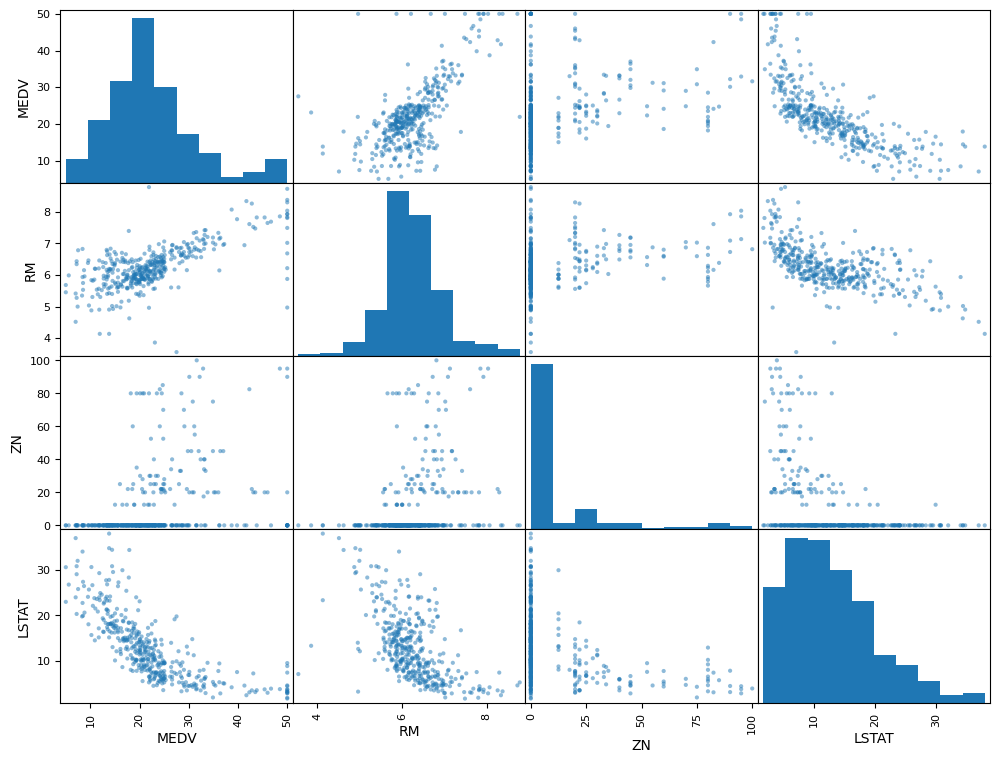

In [21]:
from pandas.plotting import scatter_matrix
attr=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attr],figsize=(12,9))

<Axes: xlabel='RM', ylabel='MEDV'>

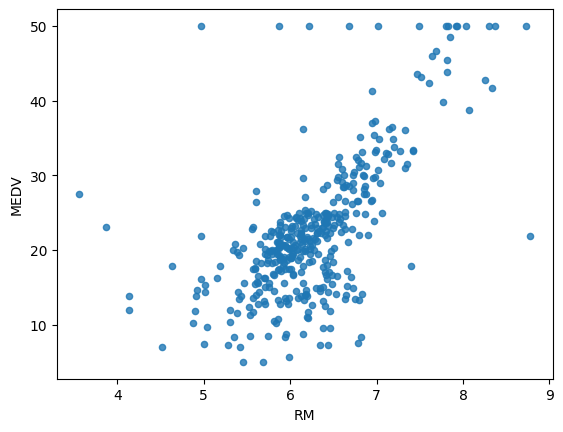

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Attribute combination

In [23]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


<Axes: xlabel='TAXRM', ylabel='MEDV'>

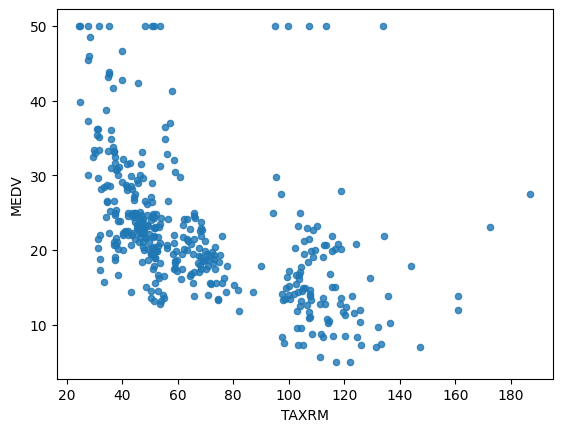

In [25]:
housing.plot(kind="scatter",x="TAXRM",y='MEDV',alpha=0.8)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
#to take care of missing attributs we have 3 options:
# 1.Get rid of the missing data points
# 2.Get rid of the whole attributes
# 3.Set the value to some value(0,mean,median)

In [28]:
a=housing.dropna(subset=["RM"]) #option 1
#housing.info()
a.shape

(401, 13)

In [29]:
housing.drop("RM",axis=1).shape #option 2
#note:there is no RM column
#note:-original housing(train) dataframe will remain unchanged

(404, 12)

In [30]:
median=housing["RM"].median()
housing["RM"].fillna(median)
#note:-original df is unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe() #before we start filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.254274,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.690562,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.606000,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [34]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.253760,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688013,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily 3 types of objects

1. Estimators-It estimates Some Paramter bassed on a dataset.Eg:Imputer.It has a fit method and transform method.
              Fit()-Fits the dataset and calculates internal Patameters.

3. Transformers:-It takes innput and return output bassed on the learning from Fit().It also has a convenience function called                               Fit_transform() which fits and then transform.

4. Predictors-LinearRegression model is an example of predictor.Fit() and Predict() are two common functions.It also gives score() function               which will evaluate the predictions.

## Feature Scaling

Primarliy, 2 types of feature scaling methods:
1. Min-max scaling(Normalization):-values will always lie between 0-1.
             formula:-  (value-min)/(max-min)                           #sklearn provides a class called MinMaxScaler for this
   
3. Standardization
          formula:- (Value - mean)/std                                   #sklearn provides a class called standardscaler for this

## Creating Pipeline

In [35]:
#pipeline-aisa code jisme changes aaram se kr sko,aaram se strategy change kr sko(starting se lgana tha pipeline)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([('imputer',SimpleImputer(strategy="median")),
                       #we can add as many as we want in my pipeline
                                                ('std_scalar',StandardScaler()),])

In [37]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real-Estates

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

## Predicting the model

In [39]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([20.725, 27.57 , 12.431, 20.989, 21.676])

In [40]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## Evaluating the model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

np.float64(1.16202983252719)

## Using better evaluation technique-Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-score)
rmse_score

array([3.41664503, 2.59279819, 4.94046642, 2.79496725, 2.82690373,
       2.3729182 , 2.91243221, 2.84619521, 2.14009509, 4.352256  ])

In [43]:
def print_score(score):
    print("scores:",score)
    print("Mean:",score.mean())
    print("Standard deviation:",score.std())

In [44]:
print_score(rmse_score)

scores: [3.41664503 2.59279819 4.94046642 2.79496725 2.82690373 2.3729182
 2.91243221 2.84619521 2.14009509 4.352256  ]
Mean: 3.1195677329171114
Standard deviation: 0.8382386874032145


## Saving the model

In [46]:
from joblib import dump,load
dump(model,'real.joblib')

['real.joblib']

## Testing the model on test data

In [47]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [48]:
final_mse

np.float64(11.297079306930689)

In [51]:
prepared_data[0]


array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54974005, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

## using the model

In [52]:
from joblib import dump,load
import numpy as np
model=load('real.joblib')

In [53]:
features=np.array([[-0.44241248,  8.18716752, -3.12581552, -11.27288841, -1.42038605,
       -0.54974005, -13.7412613 ,  10.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.125])